<a href="https://colab.research.google.com/github/zizanayub/Machine-Leaning-Data-Scientist-with-Python/blob/main/01_01_Supervised_Learning_with_Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
churn_df = pd.read_csv('/content/drive/MyDrive/Machine Learning Data Scientist Course/telecom_churn_clean.csv')
churn_df.head()

,Unnamed: 0,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


## 01. Using Scikit-Learn to fit a classifier

In [3]:
from sklearn.neighbors import KNeighborsClassifier  ##Q1
X = churn_df[["total_day_charge","total_eve_charge"]].values #Q3
y = churn_df['churn'].values ##Q4
print(X.shape,y.shape)

(3333, 2) (3333,)


In [4]:
knn = KNeighborsClassifier(n_neighbors = 6)   ##Q2
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=6)

In [5]:
X_new = np.array([[78,87.2],[21.2,67],[78.1,99]])
predictions = knn.predict(X_new)
print("Predictions: {}".format(predictions))

Predictions: [1 0 1]


##02. Train/Test Split

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 21,test_size = 0.3,stratify = y)  #Q1. Explain all of the parameters.
knn.fit(X_train,y_train)
print(knn.score(X_test,y_test))        #Q2. `knn.score(X_test,y_test)`, WHAT and HOW?

0.872


##03. Model Complexity and over/underfitting

In [7]:
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1,26)

for neighbor in neighbors:
  knn = KNeighborsClassifier(n_neighbors = neighbor)
  knn.fit(X_train,y_train)
  train_accuracies[neighbor] = knn.score(X_train,y_train)
  test_accuracies[neighbor] = knn.score(X_test,y_test)


print(train_accuracies)
print(test_accuracies)

{1: 1.0, 2: 0.9061294470638662, 3: 0.9048435490784398, 4: 0.8911273039005573, 5: 0.8906986712387484, 6: 0.8851264466352337, 7: 0.8829832833261895, 8: 0.8825546506643807, 9: 0.8834119159879983, 10: 0.8825546506643807, 11: 0.8812687526789541, 12: 0.8804114873553365, 13: 0.8816973853407629, 14: 0.8799828546935277, 15: 0.8834119159879983, 16: 0.8812687526789541, 17: 0.8808401200171453, 18: 0.8795542220317188, 19: 0.8786969567081011, 20: 0.8808401200171453, 21: 0.8808401200171453, 22: 0.8782683240462923, 23: 0.8821260180025718, 24: 0.8774110587226747, 25: 0.8812687526789541}
{1: 0.807, 2: 0.871, 3: 0.855, 4: 0.873, 5: 0.867, 6: 0.872, 7: 0.875, 8: 0.876, 9: 0.88, 10: 0.878, 11: 0.878, 12: 0.877, 13: 0.878, 14: 0.877, 15: 0.879, 16: 0.881, 17: 0.879, 18: 0.876, 19: 0.878, 20: 0.877, 21: 0.876, 22: 0.877, 23: 0.881, 24: 0.879, 25: 0.88}


##04. Plotting Training and Test Accuracies

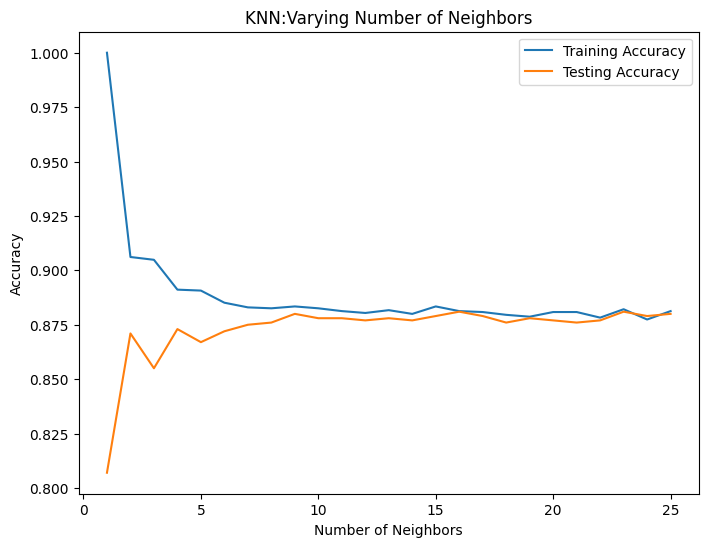

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.title("KNN:Varying Number of Neighbors")
plt.plot(neighbors,train_accuracies.values(),label = "Training Accuracy")
plt.plot(neighbors,test_accuracies.values(),label = "Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

##05. Predicting Blood Glucose Level

In [9]:
diabetes_df = pd.read_csv('/content/drive/MyDrive/Machine Learning Data Scientist Course/diabetes_clean.csv')
diabetes_df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##06. Creating features and target arrays

In [10]:
X = diabetes_df.drop('glucose',axis = 1).values
y = diabetes_df['glucose'].values
print(type(X),type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


##07. Making prediction from a single feature

In [11]:
X_bmi = X[:,4]
print(X_bmi.shape,y.shape)

(768,) (768,)


##08. Reshaping `X_bmi`

In [12]:
X_bmi = X_bmi.reshape(-1,1)
print(X_bmi.shape)

(768, 1)


##09. Plotting Glucose vs. BMI

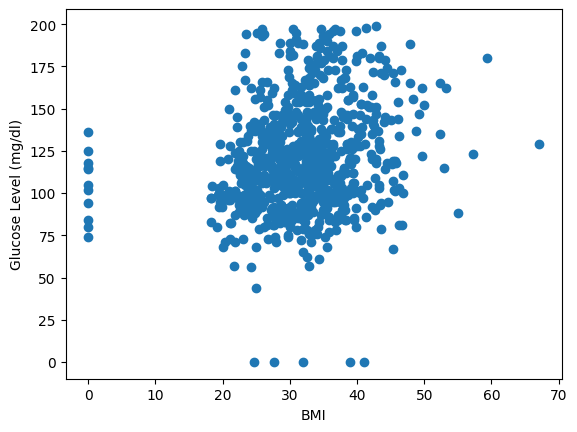

In [13]:
plt.scatter(X_bmi,y)
plt.xlabel("BMI")
plt.ylabel("Glucose Level (mg/dl)")
plt.show()

##10. Fitting a regression model

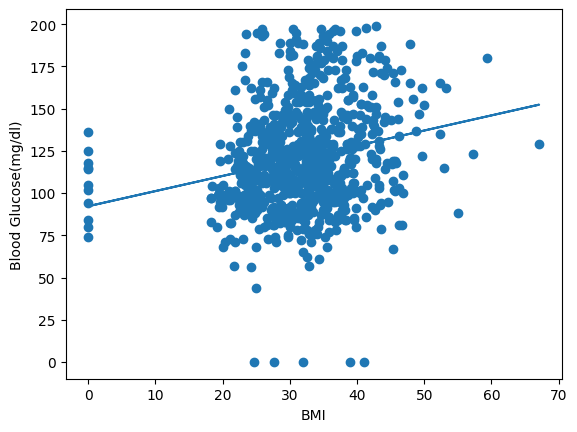

In [14]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_bmi,y)
predictions = reg.predict(X_bmi)


plt.scatter(X_bmi,y)
plt.plot(X_bmi,predictions)
plt.ylabel("Blood Glucose(mg/dl)")
plt.xlabel("BMI")
plt.show()

##11. Linear Regression in Higher Dimensions

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 21,test_size = 0.3)
reg_all = LinearRegression()
reg_all.fit(X_train,y_train)
y_pred = reg_all.predict(X_test)

In [16]:
reg_all.score(X_test,y_test)

0.28701582460171715

##12. Finding Mean Squared Error

In [17]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred,squared = True)
rmse = mean_squared_error(y_test,y_pred,squared = False)
print(mse, rmse)

636.8297799182924 25.235486520340604


##13. Cross-Validation in Scikit-Learn

In [18]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits = 6, shuffle = True, random_state = 42)
reg = LinearRegression()
cv_results = cross_val_score(reg,X,y,cv = kf)
print(cv_results)

[0.26207548 0.28228176 0.41203082 0.23785884 0.41634629 0.30398869]


##14. Evaluating Cross-Validation Performance


In [19]:
print(np.mean(cv_results),np.std(cv_results))

0.31909697867344794 0.070153206101142


In [20]:
print(np.quantile(cv_results,[0.025,0.975]))

[0.24088592 0.41580685]


##15. Ridge Regression

In [21]:
from sklearn.linear_model import Ridge
scores = []

for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:
  ridge = Ridge(alpha = alpha)
  ridge.fit(X_train,y_train)
  y_pred = ridge.predict(X_test)
  scores.append(ridge.score(X_test,y_test))

print(scores)

[0.2871821081288142, 0.28864884538557534, 0.30075083865691354, 0.3266444676302306, 0.290386181740535]


##16. Lasso Regression

In [22]:
from sklearn.linear_model import Lasso
scores = []

for alpha in [0.1,1.0,10.0,20.0,50.0]:
  lasso = Lasso(alpha = alpha)
  lasso.fit(X_train,y_train)
  y_pred = lasso.predict(X_test)
  scores.append(lasso.score(X_test,y_test))

print(scores)

[0.2929135689092045, 0.3298222738388288, 0.2621354084106098, 0.2437901341500236, 0.19875769891921435]


##17. Lasso for feature selection in scikit-learn

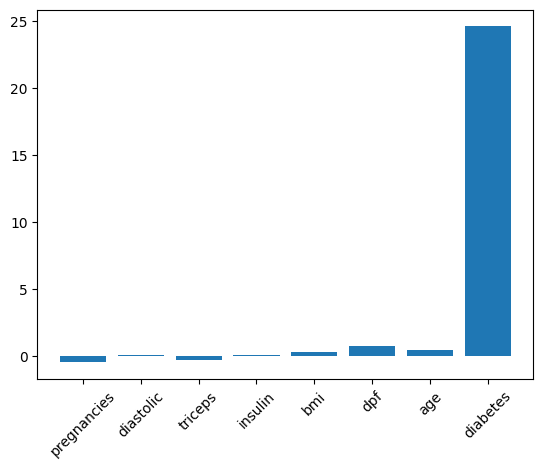

In [23]:
from sklearn.linear_model import Lasso
X = diabetes_df.drop("glucose",axis = 1).values
y = diabetes_df["glucose"].values
names = diabetes_df.drop("glucose",axis = 1).columns

lasso = Lasso(alpha = 0.1)
lasso_coef = lasso.fit(X,y).coef_

plt.bar(names,lasso_coef)
plt.xticks(rotation = 45)
plt.show()


###Exercise (Ridge Regression)


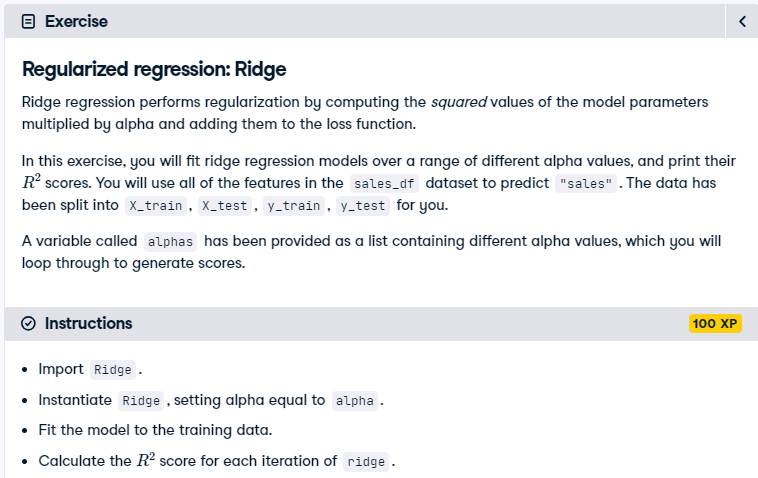

In [24]:
# Import Ridge
from sklearn.linear_model import Ridge
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:

  # Create a Ridge regression model
  ridge = Ridge(alpha = alpha)

  # Fit the data
  ridge.fit(X_train,y_train)

  # Obtain R-squared
  score = ridge.score(X_test,y_test)
  ridge_scores.append(score)
print(ridge_scores)


[0.2871821081288142, 0.28864884538557534, 0.30075083865691354, 0.3266444676302306, 0.290386181740535, 0.2690692670112643]


###Exercise(Lasso Regression)


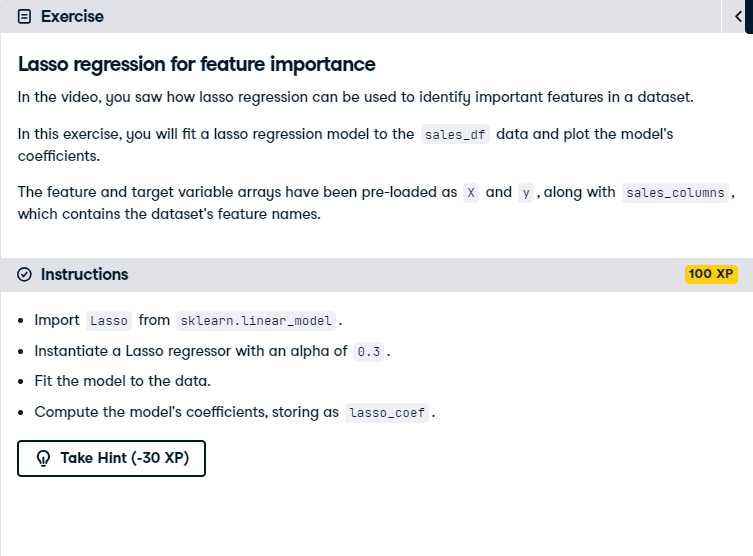

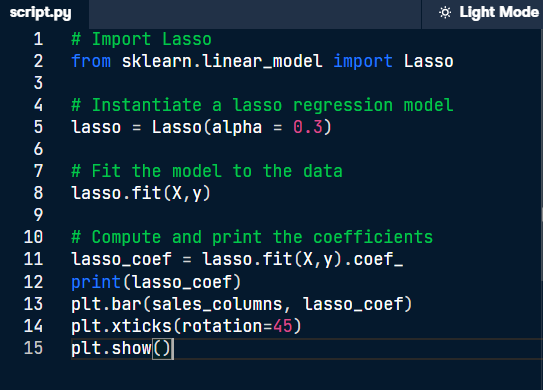

##18. Confusion Matrix

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

telecom_churn_db = pd.read_csv('/content/drive/MyDrive/Machine Learning Data Scientist Course/telecom_churn_clean.csv')
telecom_churn_db.head()


knn = KNeighborsClassifier(n_neighbors = 7)
X_telecom_churn = telecom_churn_db[['total_day_charge','total_eve_charge']].values
y_telecom_churn = telecom_churn_db['churn'].values
print(X_telecom_churn.shape,y_telecom_churn.shape)


X_train,X_test,y_train,y_test = train_test_split(X_telecom_churn,y_telecom_churn,test_size = 0.3,random_state = 42,stratify = y_telecom_churn)
print(X_train.shape,X_test.shape)



knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)


(3333, 2) (3333,)
(2333, 2) (1000, 2)


In [26]:
print(confusion_matrix(y_test,y_pred))

[[822  33]
 [ 97  48]]


In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93       855
           1       0.59      0.33      0.42       145

    accuracy                           0.87      1000
   macro avg       0.74      0.65      0.68      1000
weighted avg       0.85      0.87      0.85      1000



##19. Logistic Regression in Scikit-Learn

In [28]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
logreg.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

##20. Predicting Probabilities

In [29]:
y_pred_probs = logreg.predict_proba(X_test)[:,1]
print(y_pred_probs[0])

0.18301601621937866


##21. Plotting the ROC Curve

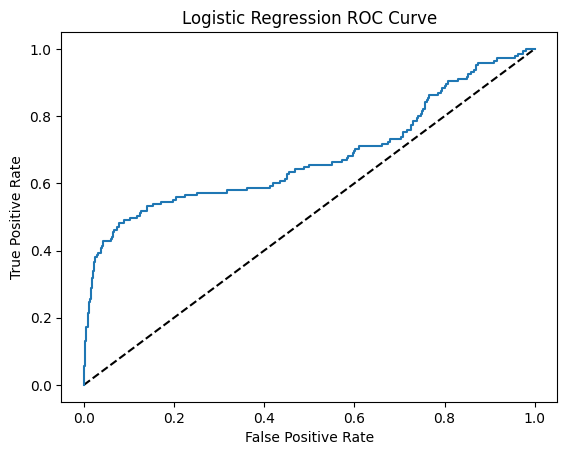

In [30]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_test,y_pred_probs)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.show()

##22. AUC in Scikit Learn

In [31]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,y_pred_probs))

0.677870538415003


##23. GridSearchCV in sklearn

In [32]:
from sklearn.model_selection import train_test_split
advertising_sales_df = pd.read_csv('/content/drive/MyDrive/Machine Learning Data Scientist Course/advertising_and_sales_clean.csv')

X_advertising_sales = advertising_sales_df.drop('sales',axis = 1)
X_advertising_sales = X_advertising_sales.drop('influencer',axis = 1).values
y_advertising_sales = advertising_sales_df['sales'].values

print(X_advertising_sales.shape,y_advertising_sales.shape)

X_advertising_sales_train,X_advertising_sales_test,y_advertising_sales_train,y_advertising_sales_test = train_test_split(X_advertising_sales,y_advertising_sales,test_size=0.3,random_state=42)

(4546, 3) (4546,)


In [33]:
from sklearn.model_selection import GridSearchCV
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)
param_grid = {'alpha' : np.arange(0.0001,1,10),
              "solver" : ["sag","lsqr"]}

ridge = Ridge()
ridge_cv = GridSearchCV(ridge,param_grid,cv = kf)
ridge_cv.fit(X_advertising_sales_train,y_advertising_sales_train)
print(ridge_cv.best_params_,ridge_cv.best_score_)

{'alpha': 0.0001, 'solver': 'sag'} 0.9989759310756516


##24. RandomizedSearchCV

In [34]:
from sklearn.model_selection import RandomizedSearchCV
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)
param_grid = {'alpha' : np.arange(0.0001,1,10),
              'solver': ["sag","lsqr"]}

ridge = Ridge()
ridge_cv = RandomizedSearchCV(ridge,param_grid,cv = kf,n_iter = 2)
ridge_cv.fit(X_advertising_sales_train,y_advertising_sales_train)
print(ridge_cv.best_params_,ridge_cv.best_score_)

{'solver': 'sag', 'alpha': 0.0001} 0.9989758960033684


##25. Evaluating on Test Set

In [35]:
test_score = ridge_cv.score(X_advertising_sales_test,y_advertising_sales_test)
test_score

0.9990152389081411

##Exercise

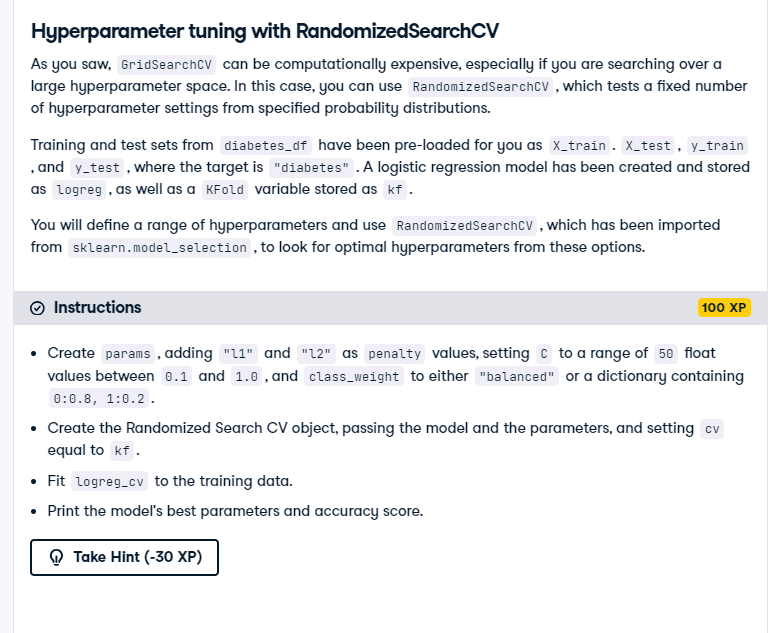

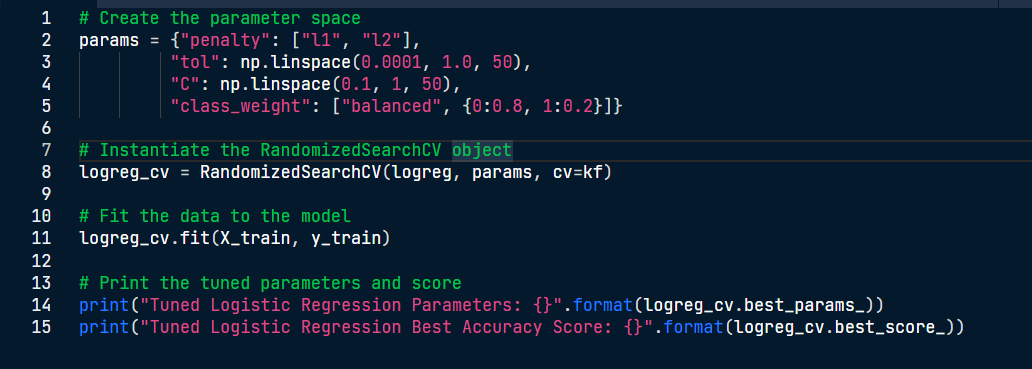

##26. Encoding Dummy Variables

In [36]:
import pandas as pd
music_df = pd.read_csv('/content/drive/MyDrive/Machine Learning Data Scientist Course/music_clean.csv')
music_dummies = pd.get_dummies(music_df['genre'],drop_first = True)
print(music_dummies.head())

      1
0  True
1  True
2  True
3  True
4  True


In [37]:
music_dummies = pd.get_dummies(music_df,drop_first=True)
print(music_dummies.columns)

Index(['Unnamed: 0', 'popularity', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'genre'],
      dtype='object')


##27. Linear Regression with Dummy Variables


In [38]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
X_music = music_dummies.drop('popularity',axis =1).values
y_music = music_dummies['popularity'].values

X_music_train,X_music_test,y_music_train,y_music_test = train_test_split(X_music,y_music,test_size = 0.3, random_state = 42)


kf = KFold(n_splits = 5, shuffle = True, random_state = 42)
linreg = LinearRegression()
linreg_cv = cross_val_score(linreg,X_music_train,y_music_train,cv = kf, scoring = "neg_mean_squared_error")
print(np.sqrt(-linreg_cv))

[ 8.54974458 10.30548473 10.485822   10.32767843  9.32783382]


##28. Finding the missing values in each row

In [39]:
print(music_df.isna().sum().sort_values())

Unnamed: 0          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
genre               0
dtype: int64


##29. Dropping missing data

In [40]:
music_df = music_df.dropna(subset = ["genre","popularity","loudness","liveness","tempo"])
print(music_df.isna().sum().sort_values())

Unnamed: 0          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
genre               0
dtype: int64


In [41]:
## Libraries
from sklearn.impute import SimpleImputer


## Working with variables
X_cat = music_df["genre"].values.reshape(-1,1)
X_num = music_df.drop(["popularity","genre"], axis = 1).values
y = music_df["popularity"].values


## Splitting
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_cat,y,test_size = 0.2, random_state = 12)
X_train_num, X_test_num, y_train_num, y_test_num = train_test_split(X_num,y,test_size = 0.2, random_state = 12)


## Introducing variable of imp_cat
imp_cat = SimpleImputer(strategy = "most_frequent")

## fit_transform
X_train_cat = imp_cat.fit_transform(X_train_cat)
X_test_cat = imp_cat.transform(X_test_cat)

## 31. Imputation with Numeric Values

In [42]:
## Instansiate and define the variables
imp_num = SimpleImputer()
X_train_num = imp_num.fit_transform(X_train_num)
X_test_num = imp_num.transform(X_test_num)

## Append all the num and cat data


X_train = np.append(X_train_num,X_train_cat,axis = 1)
X_test = np.append(X_test_num,X_test_cat,axis = 1)

##32. Imputing within a Pipeline

In [43]:
from sklearn.pipeline import Pipeline

## Define variables
X_music_df = music_df.dropna(subset=["genre","popularity","loudness","liveness","tempo"])
music_df["genre"] = np.where(music_df["genre"]=="rock",1,0)

X_music = X_music_df.drop("genre",axis = 1).values
y_music = music_df["genre"].values


## Introducing Steps
steps = [("imputation",SimpleImputer()),
         ("logistic_regression",LogisticRegression())]


## Instantiate the pipeline
pipeline = Pipeline(steps)


## Splitting the variables
X_train,X_test,y_train,y_test = train_test_split(X_music,y_music,test_size = 0.2, random_state = 42)


## Fit the pipeline
# pipeline.fit(X_train, y_train)
# pipeline.score (X_test,y_test)


##33. Scaling in Scikit-Learn

In [44]:
from sklearn.preprocessing import StandardScaler

X_music_df = music_df.drop("genre",axis=1).values
y_music_df = music_df["genre"].values

X_music_train,X_music_test,y_music_train,y_music_test = train_test_split(X_music_df,y_music_df,test_size = 0.2, random_state = 42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_music_train)
X_test_scaled = scaler.transform(X_music_test)


print(np.mean(X_music_df),np.std(X_music_df))
print(np.mean(X_train_scaled),np.std(X_train_scaled))

20666.582585618085 68890.98734103922
3.5971225997855074e-16 0.9999999999999996


##34. Scaling in a Pipeline

In [45]:
steps = [('scaler',StandardScaler()),
         ('knn',KNeighborsClassifier(n_neighbors = 6))]

pipeline = Pipeline(steps)
X_music_train,X_music_test,y_music_train,y_music_test = train_test_split(X_music_df,y_music_df,test_size = 0.2, random_state = 42)

knn_scaled = pipeline.fit(X_music_train,y_music_train)
y_pred = knn_scaled.predict(X_music_test)
print(knn_scaled.score(X_music_test,y_music_test))

1.0


##35. Comparing performance using unscaled data

In [46]:
X_music_train,y_music_test,y_music_train,y_music_test = train_test_split(X_music_df,y_music_df,test_size = 0.2, random_state = 42)
knn_unscaled = KNeighborsClassifier(n_neighbors=6).fit(X_music_train,y_music_train)
print(knn_unscaled.score(X_music_test,y_music_test))

1.0


##36. CV and Scaling in a pipeline

In [47]:
from sklearn.model_selection import GridSearchCV

steps = [('scaler',StandardScaler()),
         ('knn',KNeighborsClassifier())]

pipeline = Pipeline(steps)
parameters = {'knn__n_neighbors':np.arange(1,50)}

X_music_train, X_music_test, y_music_train, y_music_test = train_test_split(X_music_df,y_music_df,test_size = 0.2,random_state = 42)

cv = GridSearchCV(pipeline, param_grid = parameters)
cv.fit(X_music_train,y_music_train)
y_music_pred = cv.predict(X_music_test)

y_music_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

##37. Checking best parameters


In [48]:
print(cv.best_params_)
print(cv.best_score_)

{'knn__n_neighbors': 1}
1.0


##38. Evaluating Classification Model

In [50]:
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold,cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

X_music_df = music_df.drop("genre",axis = 1).values
y_music_df = music_df["genre"].values

X_music_train, X_music_test, y_music_train, y_music_test = train_test_split(X_music_df, y_music_df, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
X_music_trained_scaled = scaler.fit_transform(X_music_train)
X_music_test_scaled = scaler.transform(X_music_test)

##39. Evaluating Classification Model

In [53]:
# models = {"Logistic Regression":LogisticRegression(),
#           "KNN":KNeighborsClassifier(),
#           "Decision Tree": DecisionTreeClassifier()}

# results = []

# for model in models.values():
#   kf = KFold(n_splits = 6, random_state = 42, shuffle = True)
#   cv_results = cross_val_score(model,X_music_trained_scaled,y_music_train, cv = kf)
#   results.append(cv_results)

# plt.boxplot(results,labels = models.keys())
# plt.show()

##40. Test set performance

In [ ]:
# for name, model in models.items():
#   model.fit(X_music_trained_scaled,y_music_train)
#   test_score = model.score(X_music_test_scaled, y_music_test)
#   print("{} Test Set Accuracy {}".format(name,test_score))